# Spaceship Titanic


## イントロダクション

宇宙船タイタニック号は, 1 カ月前に就航した恒星間旅客船です．約 13,000 人の乗客を乗せたこの船は，太陽系からの移住者を，近くの星の周りを回る 3 つの新しく居住可能な太陽系外惑星に運ぶ処女航海に出発しました．

宇宙船タイタニックは，ケンタウルス座アルファ星を周回し，最初の目的地であるカンクリ星 55 番地へ向かう途中，砂煙の中に隠れていた時空の異変に遭遇しました．残念なことに，この船は 1000 年前のタイタニック号と同じ運命をたどってしまいました．船は無事だったものの，乗客の半数近くが異次元に飛ばされてしまったのです！

救助隊を助け，失われた乗客を取り戻すために，宇宙船の破損したコンピューターシステムから回収された記録をもとに，どの乗客が異常によって運ばれたかを予測することに挑戦してください．

彼らを救い，歴史を変えることに貢献しましょう！


## データを入手する


In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

In [122]:
import pathlib

# 訓練セットのデータを読み込む
train_data_path = pathlib.Path("../input/spaceship-titanic/train.csv")
train_data = pd.read_csv(
    train_data_path,
    dtype={
        "PassengerId": "string",
        "HomePlanet": "string",
        "Cabin": "string",
        "Destination": "string",
    },
)
print("データの読み込みが終わりました")

データの読み込みが終わりました


## データの内容を概観する


In [112]:
# 最初の５行を見る
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


データの各列についての説明

- `PassengerId` - 各旅客のユニークな ID. 各 ID は `ggggg_pp` の形式をとり，`ggggg` は乗客が一緒に旅行しているグループ，`pp` はそのグループ内の番号です. グループ内の人は家族であることが多いですが，常に家族とは限りません
- `HomePlanet` - 旅客が出発した惑星で，通常は定住している惑星です.
- `CryoSleep` - 航海中，お客様が仮死状態になることを選択されたかどうかを示しています. 冷凍睡眠中のお客様は，キャビンに閉じ込められます.
- `Cabin` - 乗客が滞在するキャビン番号です. `deck/num/side` の形式で，side には P (Port)，S (Starboard) のいずれかが入ります.
- `Destination` - 乗客が降り立つ惑星です.
- `Age` - 搭乗者の年齢.
- `VIP` - 航海中に特別な VIP サービスを支払ったかどうか.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - 宇宙船タイタニック号の数々の豪華な設備で，お客様がそれぞれのサービスを利用した金額です.
- `Name` - 搭乗者の姓と名.
- `Transported` - 乗客が別の次元に転送されたかどうか. これがターゲットであり，予測しようとしている列です.


In [121]:
# 欠損値があるかどうかなどを調べる
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   string 
 1   HomePlanet    8492 non-null   string 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   string 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4), string(3)
memory usage: 891.5+ KB


In [88]:
# すべての数値属性について，統計情報を出す
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,consuming_VSR,consuming_full
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8149.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,839.768070,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1832.114465,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,864.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,28600.000000,35987.000000


## データを可視化する

### ヒストグラムを出力してみる


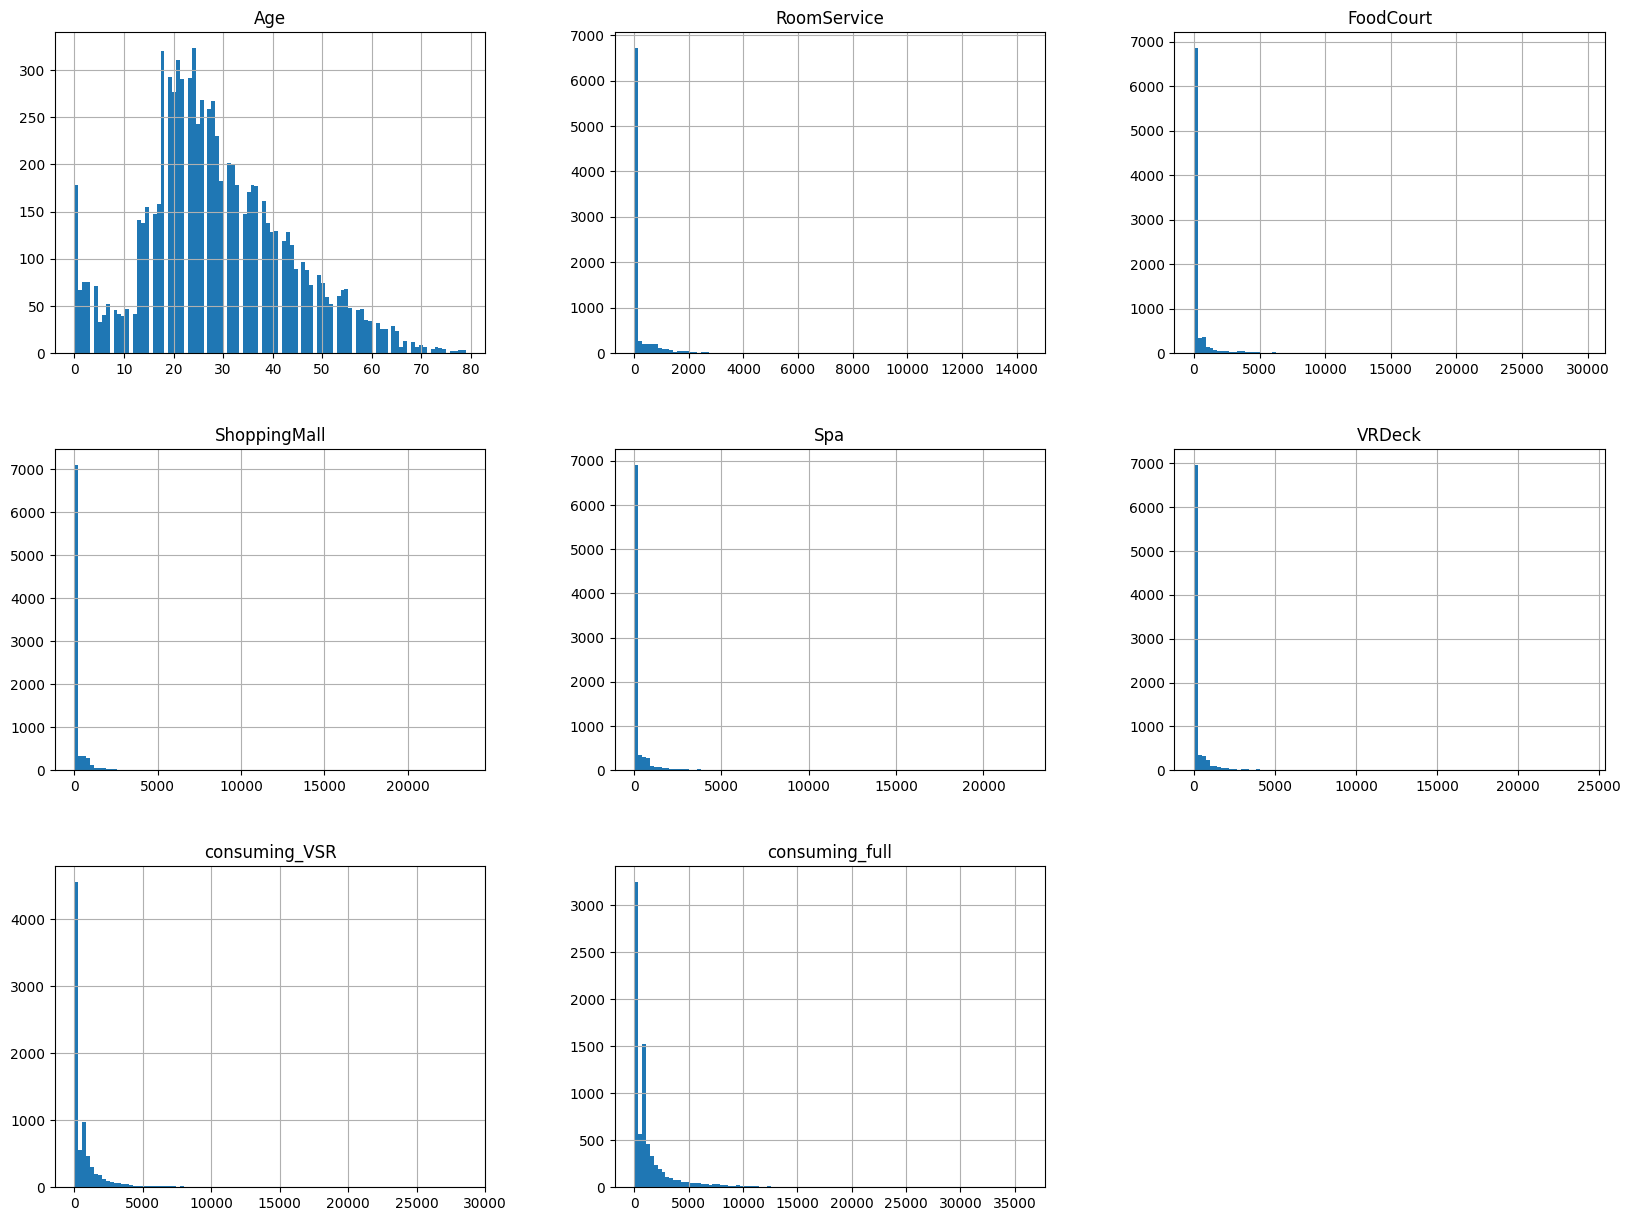

In [89]:
# ヒストグラムをプロットする
%matplotlib inline
import matplotlib.pyplot as plt

train_data.hist(bins=100, figsize=(20, 15))
plt.show()


ヒストグラムからわかること

- Age にはなぜか特定の年齢のひとがいないようだ. 一定の間隔で，該当者がゼロの年齢が現れる．
- Age 以外の５つの数値属性は，どれも０付近に値が偏っている


In [90]:
train_data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [91]:
train_data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [92]:
train_data["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [93]:
train_data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [94]:
train_data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [95]:
train_data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### サービスの消費額

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck の５つの数値属性の相関はどうなっているだろうか？


array([[<Axes: xlabel='RoomService', ylabel='RoomService'>,
        <Axes: xlabel='FoodCourt', ylabel='RoomService'>,
        <Axes: xlabel='ShoppingMall', ylabel='RoomService'>,
        <Axes: xlabel='Spa', ylabel='RoomService'>,
        <Axes: xlabel='VRDeck', ylabel='RoomService'>],
       [<Axes: xlabel='RoomService', ylabel='FoodCourt'>,
        <Axes: xlabel='FoodCourt', ylabel='FoodCourt'>,
        <Axes: xlabel='ShoppingMall', ylabel='FoodCourt'>,
        <Axes: xlabel='Spa', ylabel='FoodCourt'>,
        <Axes: xlabel='VRDeck', ylabel='FoodCourt'>],
       [<Axes: xlabel='RoomService', ylabel='ShoppingMall'>,
        <Axes: xlabel='FoodCourt', ylabel='ShoppingMall'>,
        <Axes: xlabel='ShoppingMall', ylabel='ShoppingMall'>,
        <Axes: xlabel='Spa', ylabel='ShoppingMall'>,
        <Axes: xlabel='VRDeck', ylabel='ShoppingMall'>],
       [<Axes: xlabel='RoomService', ylabel='Spa'>,
        <Axes: xlabel='FoodCourt', ylabel='Spa'>,
        <Axes: xlabel='ShoppingMall', ylab

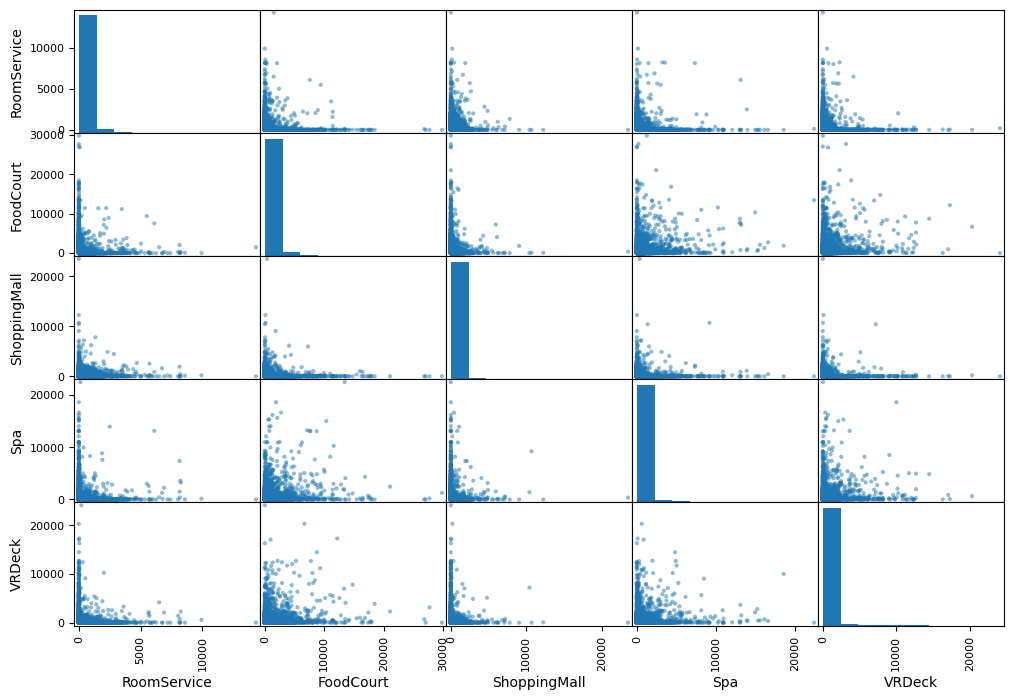

In [106]:
from pandas.plotting import scatter_matrix

attributes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

ヒストグラムは似ているが，相関はどれに関してもほとんどないようだ


予測対象のカラムに対する相関関係を調べてみよう


In [107]:
corr_matrix = train_data.corr(numeric_only=True)

corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

サービスに対する消費額が大きいほど，Transport されにくいという結果が出ている
この特徴量を組み合わせてみたらどうだろうか？


In [108]:
train_data["consuming_VSR"] = (
    train_data["VRDeck"] + train_data["Spa"] + train_data["RoomService"]
)
train_data["consuming_full"] = (
    train_data["VRDeck"]
    + train_data["Spa"]
    + train_data["RoomService"]
    + train_data["FoodCourt"]
    + train_data["ShoppingMall"]
)

corr_matrix = train_data.corr(numeric_only=True)
corr_matrix["Transported"].sort_values(ascending=False)

Transported       1.000000
FoodCourt         0.046566
ShoppingMall      0.010141
Age              -0.075026
consuming_full   -0.197671
VRDeck           -0.207075
Spa              -0.221131
RoomService      -0.244611
consuming_VSR    -0.356140
Name: Transported, dtype: float64

相関がずっと大きくなった！特に，VR と Spa と RoomService の組み合わせが良いようだ


### グループ内で一貫性があるかどうか

同じグループで区切ったときに，グループ内で Transport するかどうかは一致するだろうか？
後で調べるために，group という属性を追加しておく


In [109]:
train_data["group"] = train_data["PassengerId"].map(lambda x: x.split("_")[0])
train_data["group"]

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: group, Length: 8693, dtype: object

カテゴリ変数を調べる


In [138]:
transported_and_sleep = train_data[["Transported", "CryoSleep", "PassengerId"]].groupby(["Transported", "CryoSleep"]).count()
transported_and_sleep

PassengerId
Transported CryoSleep             
False       False             3650
            True               554
True        False             1789
            True              2483

In [157]:
# クロス集計した表を作る
cross_data = pd.crosstab(
    train_data["CryoSleep"], train_data["Transported"], normalize="index"
)
cross_data

Transported,False,True
CryoSleep,,
False,0.671079,0.328921
True,0.182417,0.817583


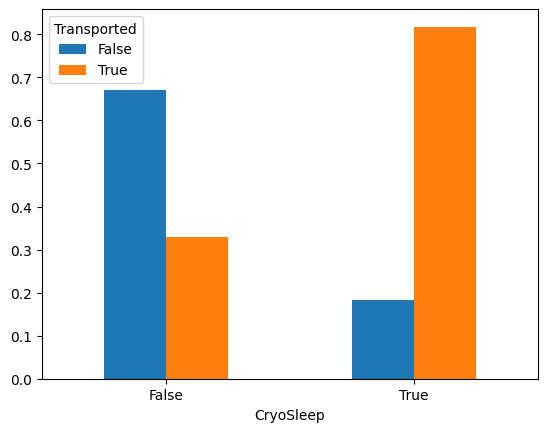

In [158]:
# 棒グラフとして表示する
barplot = cross_data.plot.bar(rot=0)

## 不要な属性を取り除く


In [110]:
# Name 属性は予測の役に立たないと思われるので削除する
# train_data = train_data.drop("Name", axis=1)
# train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,consuming_VSR,consuming_full,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,702.0,736.0,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,6807.0,10383.0,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3522.0,5176.0,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,870.0,1091.0,0004
